<a href="https://colab.research.google.com/github/mariana-0/Proyecto_2/blob/master/Limpieza_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction

## Limpieza y exploración de datos

In [341]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [342]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Información dataset

Este set de datos es usado para predecir si un paciente tiene probabilidad de sufrir un derrame basado en parámetros de entrada como género, edad, enfermedades, tipo de trabajo y residencia, entre otros. 

Fuente: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Diccionario de datos

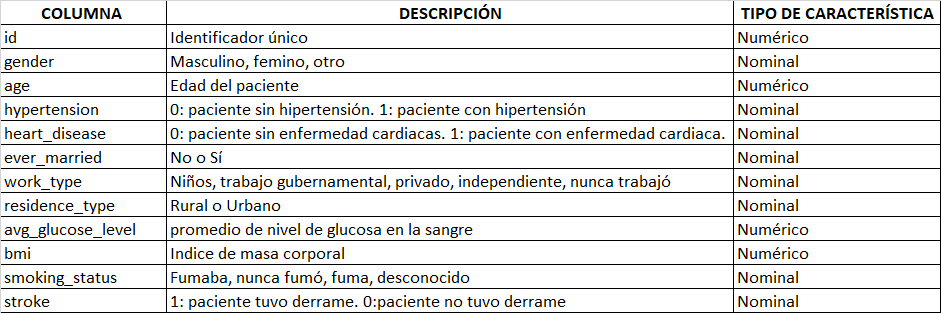

"unknown" en smoking status significa que no hay información disponible.

### Cargue de datos

In [343]:
df = pd.read_excel('/content/drive/MyDrive/CodingDojo_DataScience/P2/opcion healthcare-dataset-stroke-data.xlsx')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [344]:
df['id'].nunique()

5110

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [346]:
df['hypertension']=df['hypertension'].astype(object)
df['heart_disease']=df['heart_disease'].astype(object)

### Identifación valores faltantes.

In [347]:
df.isna().sum().sum()

201

201 datos faltantes en columna bmi (índice de masa corporal).

### Identificación filas duplicadas.

In [348]:
df.duplicated().sum()

0

No hay filas duplicadas

### Columnas innecesarias:

Las columnas que no son útiles (inicialmente) para la realización de modelos son:

*   Id


In [349]:
df = df.drop(columns=['id'])

In [350]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Idenficicaión de incosistencias en los datos.

In [351]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [352]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [353]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [354]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [355]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [356]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [357]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

No hay datos incosistentes.

In [358]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Data set desbalanceado.

### Incosistencias datos numéricos

In [359]:
df.describe()

,age,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,106.147677,28.893237,0.048728
std,22.612647,45.283560,7.854067,0.215320
min,0.080000,55.120000,10.300000,0.000000
25%,25.000000,77.245000,23.500000,0.000000
50%,45.000000,91.885000,28.100000,0.000000
75%,61.000000,114.090000,33.100000,0.000000
max,82.000000,271.740000,97.600000,1.000000


In [360]:
age=df['age']<1
age.sum()

43

No tiene sentido edades decimales, hay 43 valores menores que 1. Cambiaremos todos los valores a números enteros.

In [361]:
df['age']=df['age'].astype(int)

In [362]:
df['age'].describe()

count    5110.000000
mean       43.215264
std        22.633866
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

### Correlación

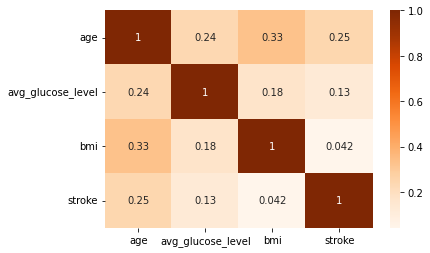

In [363]:
correlacion=df.corr()
import seaborn as sns
sns.heatmap(correlacion, cmap = 'Oranges', annot=True)

No hay datos con correlación significativa.

### Manejos datos faltantes

Tenemos 201 datos faltantes en la columna de índice de masa corporal que representan el 3.93% del total de filas; sin embargo, en la columna "smoking_status" que hace referencia a si la persona ha fumado antes o no, hay 1544 (30.41% de los datos) con un estado desconocido, lo que puede significar un problema para la realización de modelos. Se procederá a hacer manejo de ambas columnas.

**'Unknown' en Smoking_status**

In [364]:
unknown = (df['smoking_status']=="Unknown")
unknown.sum()

1544

Hay 1544 filas cuyo smoking_status es desconocido.

In [365]:
filter_1 = ((df['smoking_status']=="Unknown") & (df['age']<12))
filter_1.sum()

521

521 de los 1544 pacientes con smoking_status desconocido son menores de 12 años. Según la NSDUH (National Survey on Drug Use an Health) en un informe del año 2020, en Estados Unidos hay personas que empiezan a fumar desde los 12 años por lo que basados en esta información el smoking status "unknown" de los paciendes menores de 12 años será cambiado por "never smoked".

Fuente: https://nsduhweb.rti.org/respweb/homepage.cfm

Informe: https://www.samhsa.gov/data/sites/default/files/reports/rpt35325/NSDUHFFRPDFWHTMLFiles2020/2020NSDUHFFR1PDFW102121.pdf#page=31&zoom=100,0,97

In [366]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [367]:
df.loc[filter_1,'smoking_status'] = df.loc[filter_1,'smoking_status'].replace('Unknown', 'never smoked')

In [368]:
df['smoking_status'].value_counts()

never smoked       2413
Unknown            1023
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Aún tenemos 1023 con valor desconocido en la columna 'smoking_status'. Por ahora se dejarán estos valores con 'Unknown' como una categoría.

**Valores faltantes en 'bmi'**

Los valores faltantes en la columna 'bmi' no son muchos considerando el total de los datos, por lo que serán imputados por el promedio de los mismos.

División conjuntos de entrenamiento y prueba.

In [369]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [370]:
X = df.drop(columns=['stroke'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [371]:
mean_imputer = SimpleImputer(strategy="mean")

In [372]:
mean_imputer.fit(X_train[['bmi']])
X_train[['bmi']] = mean_imputer.transform(X_train[['bmi']])
X_test[['bmi']] = mean_imputer.transform(X_test[['bmi']])

In [373]:
X_train.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

### Identificación valores atípicos y visualización valores numéricos.

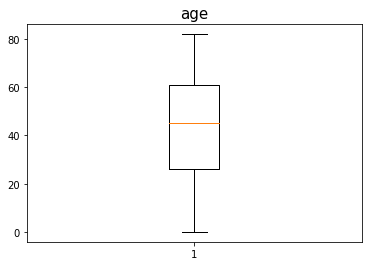

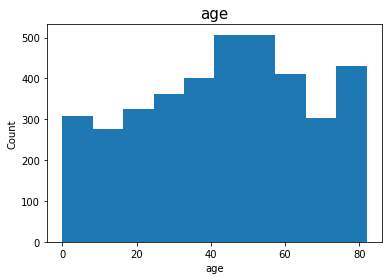

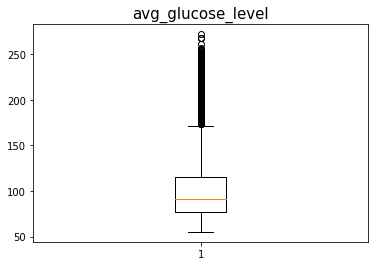

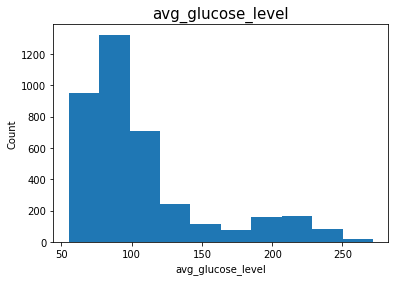

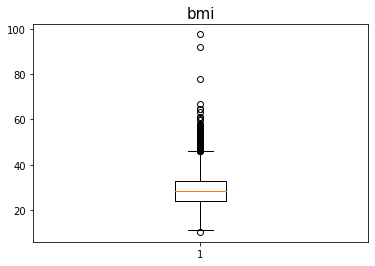

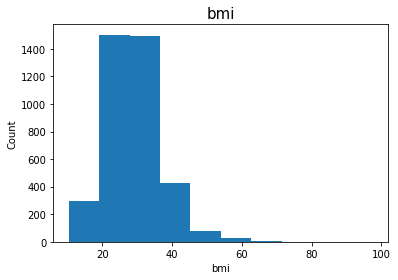

In [426]:
columns = X_train.iloc[:,0:10].columns.tolist()
i=0
for y in columns:
  if X_train[y].dtype == 'float64' or X_train[y].dtype == 'int64' :
    plt.boxplot(X_train[y])
    plt.title(y, size=15)
    plt.show()
  if X_train[y].dtype == 'float64' or X_train[y].dtype == 'int64' :
    plt.hist(X_train[y])
    plt.title(y, size=15)
    plt.xlabel(y, size=10)
    plt.ylabel('Count')
    plt.show()

Existencia de datos atípicos en el indice de masa corporal y en el promedio de glucosa en la sangre.

### Visualización valores categóricos.

In [379]:
grafica1=df['gender'].value_counts()
grafica2=df['ever_married'].value_counts()
grafica3=df['hypertension'].value_counts()
grafica4=df['heart_disease'].value_counts()
grafica4

0    4834
1     276
Name: heart_disease, dtype: int64

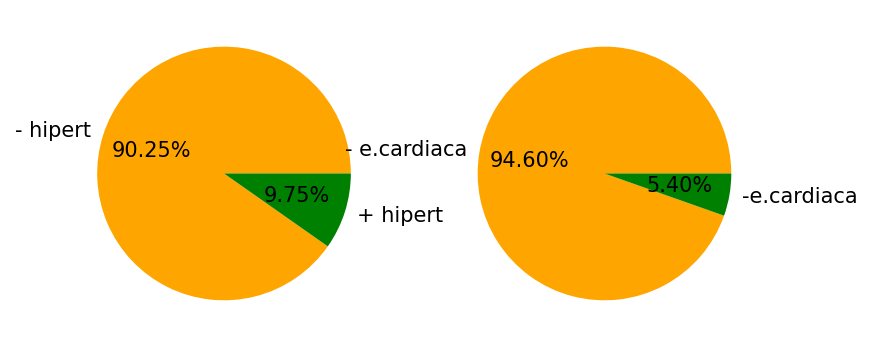

In [380]:
fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2) 

ax1.pie(grafica3, autopct='%.2f%%', labels=['- hipert','+ hipert'], colors=['orange','green'])
ax2.pie(grafica4, autopct='%.2f%%', labels=['- e.cardiaca','-e.cardiaca'], colors=['orange','green'])
plt.show()

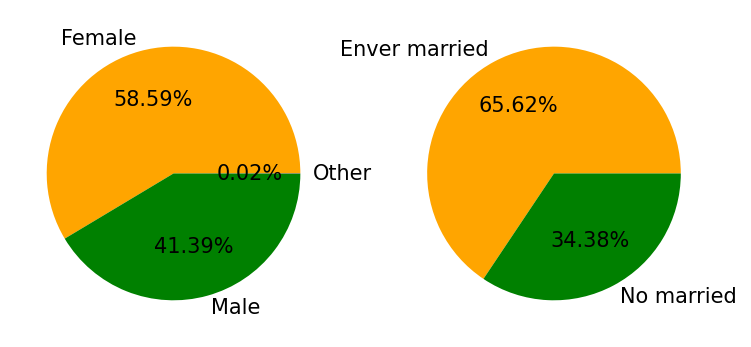

In [381]:
fig1 = plt.figure(dpi=150)
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2) 

ax1.pie(grafica1, autopct='%.2f%%', labels=['Female','Male','Other'], colors=['orange','green','blue'])
ax2.pie(grafica2, autopct='%.2f%%', labels=['Enver married','No married'], colors=['orange','green'])
plt.show()